In [81]:
import json
import pandas as pd
import numpy as np
import re

In [2]:
file_dir = 'C:/Users/Derek/Documents/Bootcamp/Module 8/MOVIES-ETL/'

In [3]:
f'{file_dir}filename'

'C:/Users/Derek/Documents/Bootcamp/Module 8/MOVIES-ETL/filename'

In [4]:
with open(f'{file_dir}wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [5]:
len(wiki_movies_raw)

7311

In [6]:
#first 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [7]:
# last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [8]:
#records in middle:
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [9]:
kaggle_metadata = pd.read_csv(f'{file_dir}Resources/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}Resources/ratings.csv')

In [ ]:
pd.concat([kaggle_metadata.head(),kaggle_metadata.tail(),kaggle_metadata.sample(n=5)])

In [14]:
pd.concat([ratings.head(),ratings.tail(),ratings.sample(n=5)])

userId  movieId  rating   timestamp
0              1      110     1.0  1425941529
1              1      147     4.5  1425942435
2              1      858     5.0  1425941523
3              1     1221     5.0  1425941546
4              1     1246     5.0  1425941556
26024284  270896    58559     5.0  1257031564
26024285  270896    60069     5.0  1257032032
26024286  270896    63082     4.5  1257031764
26024287  270896    64957     4.5  1257033990
26024288  270896    71878     2.0  1257031858
23374938  242675      175     4.0  1285062177
21482906  223157    86898     2.0  1445631157
2368730    24525     1073     2.0  1148994142
17533462  181937     4018     3.0  1059867022
16566470  172240     1280     4.0   888090414

In [16]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [17]:
wiki_movies_df.head()

url    year  \
0  https://en.wikipedia.org/wiki/The_Adventures_o...  1990.0   
1  https://en.wikipedia.org/wiki/After_Dark,_My_S...  1990.0   
2   https://en.wikipedia.org/wiki/Air_America_(film)  1990.0   
3    https://en.wikipedia.org/wiki/Alice_(1990_film)  1990.0   
4      https://en.wikipedia.org/wiki/Almost_an_Angel  1990.0   

                               imdb_link                            title  \
0  https://www.imdb.com/title/tt0098987/  The Adventures of Ford Fairlane   
1  https://www.imdb.com/title/tt0098994/             After Dark, My Sweet   
2  https://www.imdb.com/title/tt0099005/                      Air America   
3  https://www.imdb.com/title/tt0099012/                            Alice   
4  https://www.imdb.com/title/tt0099018/                  Almost an Angel   

          Directed by                  Produced by  \
0        Renny Harlin   [Steve Perry, Joel Silver]   
1         James Foley  [Ric Kidney, Robert Redlin]   
2  Roger Spottiswoode               Daniel Melnick   
3         Woody Allen              Robert Greenhut   
4        John Cornell                 John Cornell   

                                Screenplay by                     Story by  \
0  [David Arnott, James Cappe, Daniel Waters]  [David Arnott, James Cappe]   
1                [James Foley, Robert Redlin]                          NaN   
2                  [John Eskow, Richard Rush]                          NaN   
3                                         NaN                          NaN   
4                                         NaN                          NaN   

                                            Based on  \
0                        [Characters, by Rex Weiner]   
1  [the novel, After Dark, My Sweet, by, Jim Thom...   
2             [Air America, by, Christopher Robbins]   
3                                                NaN   
4                                                NaN   

                                            Starring  ... Predecessor  \
0  [Andrew Dice Clay, Wayne Newton, Priscilla Pre...  ...         NaN   
1  [Jason Patric, Rachel Ward, Bruce Dern, George...  ...         NaN   
2  [Mel Gibson, Robert Downey Jr., Nancy Travis, ...  ...         NaN   
3  [Alec Baldwin, Blythe Danner, Judy Davis, Mia ...  ...         NaN   
4        [Paul Hogan, Elias Koteas, Linda Kozlowski]  ...         NaN   

  Founders Area served Products Services Russian Hebrew Revenue  \
0      NaN         NaN      NaN      NaN     NaN    NaN     NaN   
1      NaN         NaN      NaN      NaN     NaN    NaN     NaN   
2      NaN         NaN      NaN      NaN     NaN    NaN     NaN   
3      NaN         NaN      NaN      NaN     NaN    NaN     NaN   
4      NaN         NaN      NaN      NaN     NaN    NaN     NaN   

  Operating income Polish  
0              NaN    NaN  
1              NaN    NaN  
2              NaN    NaN  
3              NaN    NaN  
4              NaN    NaN  

[5 rows x 193 columns]

In [18]:
wiki_movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [24]:
#STEP a
#require director and imdb link for records to be retained

wiki_movies = [movie for movie in wiki_movies_raw if
               ('Director' in movie or 'Directed by' in movie) and 'imdb_link' in movie and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [28]:
#cleaned data version a
wiki_movies_a = pd.DataFrame(wiki_movies)

In [54]:
def clean_movie(movie):
    movie = dict(movie) #creating a non-destructive copy
    languages = ['Also known as','Arabic','Cantonese','Chinese','French','Hangul','Hebrew','Hepburn','Japanese','Literally','Mandarin','McCune-Reischauer','Original_Title','Polish','Revised Romanization','Romanized','Russian','Simplified','Traditional','Yiddish']
    alternate_titles = {}

    def change_column_name(old_name,new_name):
        if old_name in movie:
            movie[new_name] =  movie.pop(old_name)

    for key in languages:
        if key in movie:
            alternate_titles[key]=movie.pop(key)
            #movie.pop(col)
    if len(alternate_titles) > 0:
        movie['alternate_titles']=alternate_titles


    def change_column_name(old_name,new_name):
        if old_name in movie:
            movie[new_name] =  movie.pop(old_name)

    change_column_name('Directed by', 'Director')
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release date')
    change_column_name('Length', 'Running time')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Written by', 'Writer(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Length', 'Running time')

    return movie

In [30]:
wiki_movies_a[wiki_movies_a['Arabic'].notnull()]['url']

6834    https://en.wikipedia.org/wiki/The_Insult_(film)
7058     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [31]:
sorted(wiki_movies_a.columns.to_list())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russian',
 'Screen story by',
 'Screenplay by',
 'Simplifie

In [37]:
#investigating dataset for alternative title columns, ultimately to remove
col_name='Traditional'
wiki_movies_a[wiki_movies_a[col_name].notnull()][col_name]
# languages = ['Arabic','Cantonese','Chinese','French','Hangul','Hebrew','Hepburn','Japanese','Literally','Mandarin','McCune-Reischauer','Original_Title','Polish','Revised Romanization','Romanized','Russian','Simplified','Traditional','Yiddish']

858          喜宴
1534       東宮西宮
6456        葉問3
6613         長城
6661    我們誕生在中國
Name: Traditional, dtype: object

In [55]:
#using the clean_movie function above (now updated to map column name changes)
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [56]:
#convert clean movies back to dataframe, then sort the columns
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.to_list())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original title',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alternate_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [60]:
#adding a new column to the frame, which will contain a unique id for each film, based
#on the imdb_link column, then drop any columns that have a duplicate id (meaning movie
#is contained more than once in the file)
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop(columns=['imbd_id'],inplace=True)
wiki_movies_df.drop_duplicates(subset='imdb_id',inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


url  year  \
0  https://en.wikipedia.org/wiki/The_Adventures_o...  1990   
1  https://en.wikipedia.org/wiki/After_Dark,_My_S...  1990   
2   https://en.wikipedia.org/wiki/Air_America_(film)  1990   
3    https://en.wikipedia.org/wiki/Alice_(1990_film)  1990   
4      https://en.wikipedia.org/wiki/Almost_an_Angel  1990   

                               imdb_link                            title  \
0  https://www.imdb.com/title/tt0098987/  The Adventures of Ford Fairlane   
1  https://www.imdb.com/title/tt0098994/             After Dark, My Sweet   
2  https://www.imdb.com/title/tt0099005/                      Air America   
3  https://www.imdb.com/title/tt0099012/                            Alice   
4  https://www.imdb.com/title/tt0099018/                  Almost an Angel   

                                            Based on  \
0                        [Characters, by Rex Weiner]   
1  [the novel, After Dark, My Sweet, by, Jim Thom...   
2             [Air America, by, Christopher Robbins]   
3                                                NaN   
4                                                NaN   

                                            Starring         Narrated by  \
0  [Andrew Dice Clay, Wayne Newton, Priscilla Pre...  Andrew "Dice" Clay   
1  [Jason Patric, Rachel Ward, Bruce Dern, George...                 NaN   
2  [Mel Gibson, Robert Downey Jr., Nancy Travis, ...                 NaN   
3  [Alec Baldwin, Blythe Danner, Judy Davis, Mia ...                 NaN   
4        [Paul Hogan, Elias Koteas, Linda Kozlowski]                 NaN   

   Cinematography                                       Release date  \
0     Oliver Wood                  [July 11, 1990, (, 1990-07-11, )]   
1    Mark Plummer  [May 17, 1990, (, 1990-05-17, ), (Cannes Film ...   
2   Roger Deakins                [August 10, 1990, (, 1990-08-10, )]   
3  Carlo Di Palma              [December 25, 1990, (, 1990-12-25, )]   
4    Russell Boyd                                  December 19, 1990   

  Running time  ... Suggested by alternate_titles Recorded Venue Label  \
0  102 minutes  ...          NaN              NaN      NaN   NaN   NaN   
1  114 minutes  ...          NaN              NaN      NaN   NaN   NaN   
2  113 minutes  ...          NaN              NaN      NaN   NaN   NaN   
3  106 minutes  ...          NaN              NaN      NaN   NaN   NaN   
4   95 minutes  ...          NaN              NaN      NaN   NaN   NaN   

  Animation by Color process McCune–Reischauer Original title    imdb_id  
0          NaN           NaN               NaN            NaN  tt0098987  
1          NaN           NaN               NaN            NaN  tt0098994  
2          NaN           NaN               NaN            NaN  tt0099005  
3          NaN           NaN               NaN            NaN  tt0099012  
4          NaN           NaN               NaN            NaN  tt0099018  

[5 rows x 42 columns]

In [61]:
#count na values in each column
wiki_movies_df.isna().sum().T

url                          0
year                         0
imdb_link                    0
title                        1
Based on                  4852
Starring                   184
Narrated by               6752
Cinematography             691
Release date                32
Running time               139
Country                    236
Language                   244
Budget                    2295
Box office                1548
Director                     0
Distributor                357
Editor(s)                  548
Producer(s)                202
Production company(s)     1678
Writer(s)                  199
Composer(s)                518
Genre                     6923
Original language(s)      6875
Original network          6908
Executive producer(s)     6936
Production location(s)    6986
Picture format            6969
Audio format              6972
Voices of                 7031
Followed by               7024
Created by                7023
Preceded by               7023
Suggeste

In [75]:
#create list of columns to keep, based on 90% na threshold, and then set df equal to those cols only

wiki_movies_df = wiki_movies_df.loc[:,(wiki_movies_df.isna().sum() < len(wiki_movies_df)*0.9).T]

In [76]:
#next step in data cleaning is to check data type for all the 'cleaned' columns
#and determine the correct type for each
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Producer(s)              object
Production company(s)    object
Writer(s)                object
Composer(s)              object
imdb_id                  object
dtype: object

In [77]:
#start with cols that should be numeric, which include box office, budget and running time
#we also know release date should be a date object
box_office = wiki_movies_df['Box office'].dropna()

In [79]:
#first check how much non-na data we have
len(box_office)
#then write a function to determine how much of the existing box_office data is not in string format
def is_not_a_string(x):
    return type(x) != str

#switch from using def is_not_a_string, to lambda, to simplify coding
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [80]:
#convert list data in box_office to single string, where list exists
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [82]:
#using regex to match box office amounts with the word m/billion, starting with $
form_one=r'\$\d+\.\d*\s*[mb]illion'
box_office.str.contains(form_one,flags=re.I, na=False).sum()

3319

In [84]:
form_two=r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two,flags=re.I,na=False).sum()

1544

In [87]:
matches_form_one = box_office.str.contains(form_one,flags=re.I,na=False)
matches_form_two = box_office.str.contains(form_two,flags=re.I,na=False)
box_office[(~ matches_form_one) & (~ matches_form_two)]

29         $5 million
34      US$ 4,212,828
58       $240 million
64        $86 million
66        $25 million
            ...      
7035     $174 million
7046      $76 million
7051     $323 million
7056      $43 million
7067     $468 million
Name: Box office, Length: 623, dtype: object

In [99]:
#new forms to capture additional box office values
form_one=r'\$\s\d+\.\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [89]:
#box office replace to correct range values into single numbers
box_office = box_office.str.replace(r'\$.*[---](?![a-z])', '$',regex=True)

C:\Users\Derek\anaconda3\envs\PythonData\lib\site-packages\pandas\core\strings\object_array.py:156: FutureWarning: Possible set difference at position 6
  pat = re.compile(pat, flags=flags)


In [100]:
#capture misspelling of million by adding ?, to allow for multiple i's
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

In [97]:
#create f string to combine forms and extract all
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [105]:
box_office.str.extract(f'({form_one}|{form_two})')[0]

0       $21.4 million
1        $2.7 million
2         $57,718,089
3          $7,331,647
4          $6,939,946
            ...      
7070    $19.4 million
7071    $41.9 million
7072    $76.1 million
7073    $38.4 million
7074     $5.5 million
Name: 0, Length: 5485, dtype: object

In [102]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on',s, flags = re.IGNORECASE):
        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','',s)
        # convert to float and multiply by a million
        value = float(s) * 1e6
        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s\d+\.\d*\s*billion',s,flags = re.IGNORECASE):
        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','',s)
        # convert to float and multiply by a billion
        value = float(s) * 1e9
        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)',s,flags = re.IGNORECASE):
        # remove dollar sign and commas
        s = re.sub('\$|\s|[,\.]','',s)
        # convert to float
        value = float(s)
        # return value
        return value
    # otherwise, return NaN
    else:
        return np.nan

In [108]:
#apply the parse_dollars functions to the box_office series and add back to wiki_movies
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})',flags = re.IGNORECASE)[0].apply(parse_dollars)

C:\Users\Derek\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
#since we've corrected Box office, into the new col, box_office, can drop original column
wiki_movies_df.drop('Box office',axis=1,inplace=True)

C:\Users\Derek\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [111]:
#prepare to repeat text manipulation on budget column
budget = wiki_movies_df.Budget.dropna()

In [113]:
#first step is to collapse any list data to a single string
budget = budget.map(lambda x: ''.join(x) if type(x) == list else x)
budget

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, Length: 4738, dtype: object

In [114]:
#next step is to drop the lower range of any budget entry (ex: 15-20 million) will drop the 15- and just keep 20
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [115]:
#use existing pattern matches created for box office, on budget
matches_form_one = budget.str.contains(form_one, flags=re.I, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.I, na=False)
budget[(~ matches_form_one) & (~ matches_form_two)]

136                        Unknown
204     60 millionNorwegian Kroner
478                        Unknown
973               $34[3][4]million
1126                $120[4]million
1226                       Unknown
1278                           HBO
1374                    £6,000,000
1397                    13 million
1480                  £2.8 million
1734                  CAD2,000,000
1913     PHP85 million (estimated)
1948                   102,888,900
1953                  3,500,000 DM
1973                    ₤2,300,874
2281                    $14 milion
2451                    ₤6,350,000
3144                   €40 million
3360                $150[6]million
3418                       $218.32
3802                  £4.2 million
3906                           N/A
3959                   760,000 USD
4470                      19 crore
4641                   £17 million
5034               $$200[4]million
5055             $155[2][3]million
5419                 $40[4]million
5424                

In [116]:
#removing citation references:
budget = budget.str.replace(r'\[\d+\]\s*','')
budget[~matches_form_one & ~matches_form_two]

C:\Users\Derek\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


136                        Unknown
204     60 millionNorwegian Kroner
478                        Unknown
973                     $34million
1126                   $120million
1226                       Unknown
1278                           HBO
1374                    £6,000,000
1397                    13 million
1480                  £2.8 million
1734                  CAD2,000,000
1913     PHP85 million (estimated)
1948                   102,888,900
1953                  3,500,000 DM
1973                    ₤2,300,874
2281                    $14 milion
2451                    ₤6,350,000
3144                   €40 million
3360                   $150million
3418                       $218.32
3802                  £4.2 million
3906                           N/A
3959                   760,000 USD
4470                      19 crore
4641                   £17 million
5034                  $$200million
5055                   $155million
5419                    $40million
5424                

In [120]:
#small number of unprocessed records remain, which we can ignore, so can add new column and drop the original
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

wiki_movies_df.drop('Budget', axis=1, inplace=True)

C:\Users\Derek\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Derek\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [170]:
#moving on to the release date column, we start by running same list collapsing function
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [165]:
# Full month name, one- to two-digit day, four-digit year (i.e., January 1, 2000)
# Four-digit year, two-digit month, two-digit day, with any separator (i.e., 2000-01-01)
# Full month name, four-digit year (i.e., January 2000)
# Four-digit year
pd.concat([release_date.head(10),release_date.tail(10),release_date.iloc[list(np.random.randint(11,7001,10))]])

0                            July 11, 1990 ( 1990-07-11 )
1       May 17, 1990 ( 1990-05-17 ) (Cannes Film Marke...
2                          August 10, 1990 ( 1990-08-10 )
3                        December 25, 1990 ( 1990-12-25 )
4                                       December 19, 1990
5                           March 22, 1990 ( 1990-03-22 )
6       October 6, 1990 ( 1990-10-06 ) ( New York Film...
7                            March 8, 1991 ( 1991-03-08 )
8                            March 7, 1990 ( 1990-03-07 )
9                               February 23, 1990 ( USA )
7066    November 26, 2018 ( 2018-11-26 ) ( Empire, Lei...
7067    December 3, 2018 ( 2018-12-03 ) ( Sony Center ...
7068     December 21, 2018 ( 2018-12-21 ) (United States)
7069     December 21, 2018 ( 2018-12-21 ) (United States)
7070    10 May 2018 ( 2018-05-10 ) ( Cannes ) 8 June 2...
7071     December 25, 2018 ( 2018-12-25 ) (United States)
7072    December 11, 2018 ( 2018-12-11 ) ( Samuel Gold...
7073    Novemb

In [171]:
#create four regex forms for date recognition in text strings, per above params
date_form_one = r'\w*\s\d{1,2}.{2}\d{4}'
date_form_two = r'\d{4}.\d{2}.\d{2}'
date_form_three = r'[A-Za-z]+.\d{4}'
date_form_four = r'\s{d4}\s'
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [172]:
#review results using date form extrators
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags = re.IGNORECASE)

0
0         July 11, 1990
1          May 17, 1990
2       August 10, 1990
3     December 25, 1990
4     December 19, 1990
...                 ...
7071  December 25, 2018
7072  December 11, 2018
7073   November 8, 2018
7074    August 31, 2018
7075      December 2018

[7001 rows x 1 columns]

In [173]:
#create new release_date column using date form extractors, with pd.to_datetime as the converter
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags = re.IGNORECASE)[0],infer_datetime_format=True)

In [169]:
#find source of initial error from above, which was: ParserError: bad month number 22; must be 1-12:  22, 1995
#release_date[release_date.str.contains('22, 1995')]
release_date[release_date.str.contains('States:2002')]

3067    United States:2002:08, July 17, 2002 (9) ( 200...
Name: Release date, dtype: object

In [166]:
#error source was launch day range may 21 - 22, 1995, so will find/replace '21 - ' with empty string
release_date = release_date.str.replace(r'(\s\d{1,2}.[-—–])(?![a-z][0-9])+\s[A-Za-z]*','',regex=True)

In [175]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [180]:
running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6891

In [181]:
running_time[running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE, na=False)!=True]

1347    25 : 03
1551     varies
3925    4 hours
Name: Running time, dtype: object

In [182]:
#extract the digits for running time:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [184]:
#convert running time extract strings (all extracted as string) to numeric.  using errors=coerce forces non numbers to get converted to nan. adding fillna(0) converts the generated nan to zeros
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [185]:
#adding a converter to change hours to minutes and adding an minutes to hours to get total minute value
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [187]:
#drop the original running time column
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [188]:
#start cleaning kaggle data
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [190]:
kaggle_metadata.adult.value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [195]:
#check for non-boolean in adult column
kaggle_metadata[~kaggle_metadata.adult.isin(['False','True'])]

AttributeError: 'DataFrame' object has no attribute 'adult'

In [194]:
#filter out any adult rows and then drop the adult column
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [196]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [197]:
#convert boolean string to boolean value. check if text is 'True'
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [198]:
#convert numeric columns:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [199]:
#convert date column to pd datetime
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [200]:
#run some reasonability checks:
ratings.info(null_counts=True)

C:\Users\Derek\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [201]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [202]:
#check of dates looks ok, so convert column
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

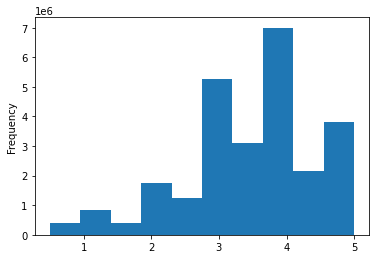

In [203]:
#create histogram to quickly get a sense of how ratings are distributed and see if anything looks really odd...
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()